In [8]:
# Standard imports 
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
titanic_df = pd.read_csv('train.csv')

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


We will analyse the dataset and answer the following questions.

Some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

6.) Did the deck have an effect on the passengers survival rate?

7.) Did having a family member increase the odds of surviving the crash?

So let's start with the first question: Who were the passengers on the titanic?

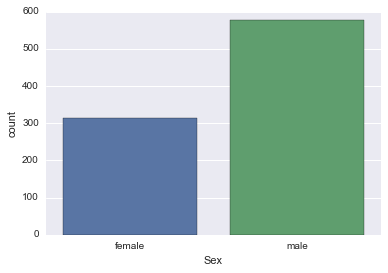

In [11]:
#sns.factorplot(x='Sex',data=titanic_df)
#sns.barplot(x="Sex", y="Survived", data=titanic_df)


# Let's first check the gender 
sns.countplot('Sex',data=titanic_df,order=['female','male'])

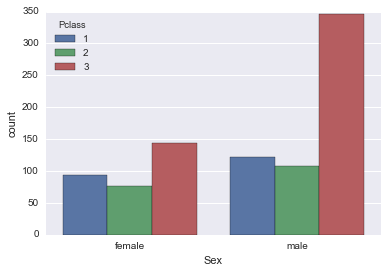

In [13]:
# Now let's seperate the classes by genders
sns.countplot('Sex',data=titanic_df,hue='Pclass',order=['female','male'])

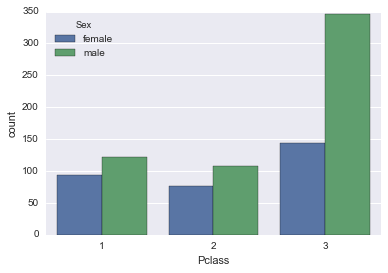

In [14]:
# Now let's seperate the genders by classes
sns.countplot('Pclass',data=titanic_df,hue='Sex',hue_order=['female','male'])

In [15]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 

def male_female_child(passenger):
    # Take the age and sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age<16:
        return 'child'
    else:
        return sex

In [16]:
# We'll define a new column called 'person', and we specify axis=1 as it is a column and not index
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [17]:
# So, we can see that it worked
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


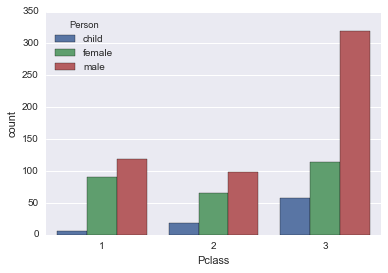

In [18]:
# Now, let's again specify the type of person according to the class
sns.countplot('Pclass',data=titanic_df,hue='Person',hue_order=['child','female','male'])

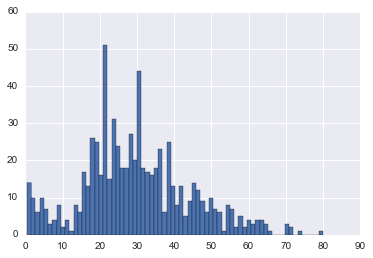

In [19]:
# Distribution of the ages to get a more precise picture of the who the passengers were.
titanic_df['Age'].hist(bins=70)

In [20]:
# We could get a quick look at the average age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [21]:
# We could also get a quick overall comparison of male,female,child
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


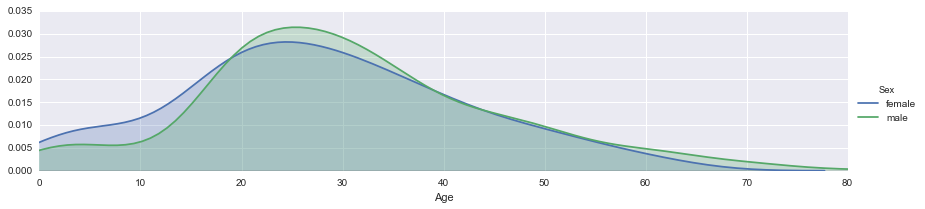

In [22]:
# Another way to visualize this data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4,hue_order=['female','male'])

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade=True)

# Set the x max limit to the oldest passenger
oldest = titanic_df['Age'].max()

# Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

# Finally add a legend
fig.add_legend()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


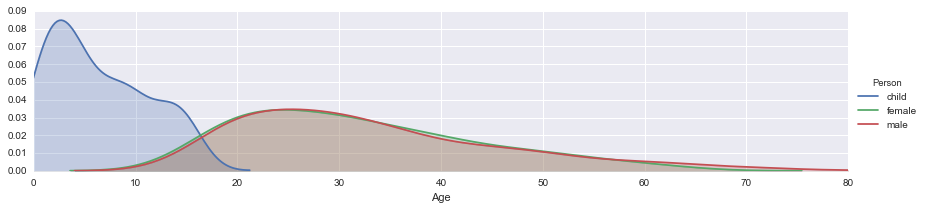

In [23]:
# We could have done the same thing for the 'person' column to include children:
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4,hue_order=['child','female','male'])
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,oldest))

fig.add_legend()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


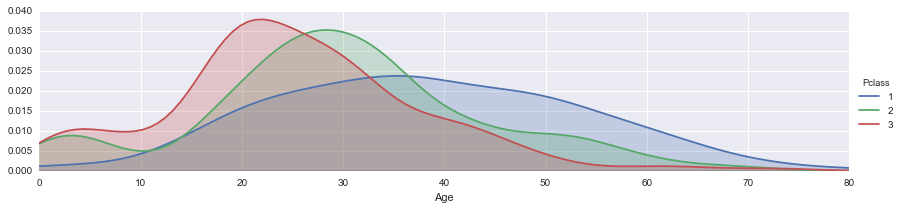

In [24]:
# We could do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,oldest))

fig.add_legend()

In [25]:
# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [26]:
# First we'll drop the NaN values and create a new object, deck
Deck = titanic_df['Cabin'].dropna()

In [27]:
# Let's see how our new deck object looks like
Deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

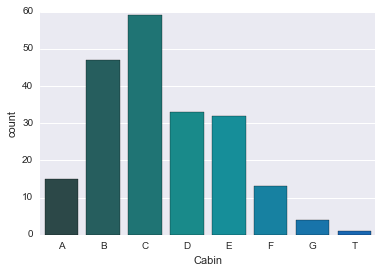

In [28]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in Deck:
    levels.append(level[0])

# Reset DataFrame and use count plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=['A','B','C','D','E','F','G','T'])


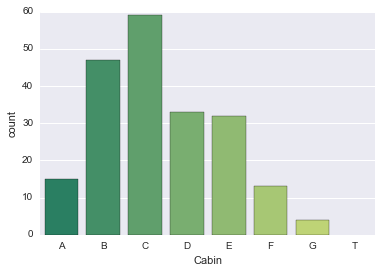

In [29]:
# Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code
# Redefine cabin_df as everything but where the row was equal to 'T'

cabin_df = cabin_df[cabin_df.Cabin != 'T']

# Replot
sns.countplot('Cabin',data=cabin_df,palette='summer',order=['A','B','C','D','E','F','G','T'])

Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

3.) Where did the passengers come from?

In [30]:
# Let's again look at the original data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

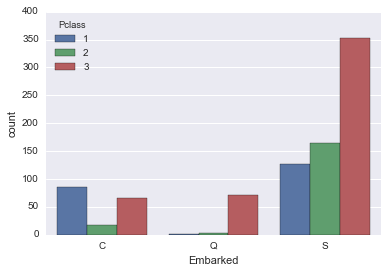

In [31]:
# Now we can make a quick countplot to check out the results
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

4.) Who was alone and who was with family?

In [32]:
# Who was alone and who was with Family?
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [33]:
# Look for >0 or ==0 to set alone status

titanic_df['Alone'].loc[titanic_df['Alone'] > 0 ] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
# Now, we can seethat it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


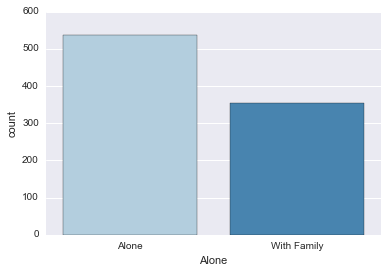

In [35]:
# Now let's see a simple visualization!
sns.countplot('Alone',data=titanic_df,palette='Blues',order=['Alone','With Family'])

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

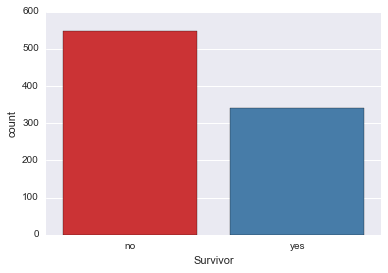

In [36]:
# Let's just get a quick overall view of survied vs died, by creating a new column for legibility purposes through mapping.
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
sns.countplot('Survivor',data=titanic_df,palette='Set1')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

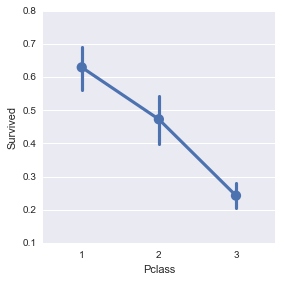

In [37]:
# Let's use a factor plot, to see how many people survived but now considering class
sns.factorplot('Pclass','Survived',data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

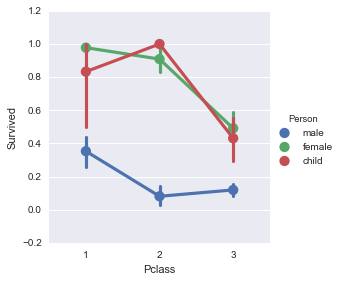

In [38]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

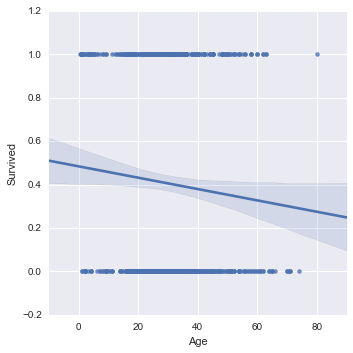

In [39]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

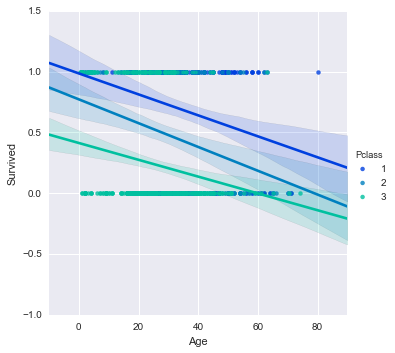

In [40]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

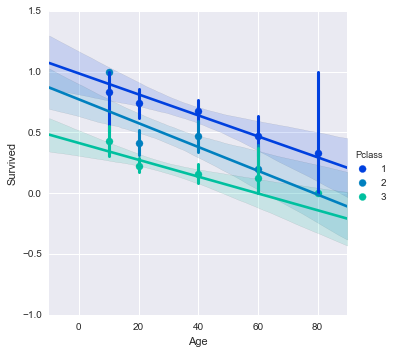

In [41]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

Interesting find on the older 1st class passengers! What if we relate the gender and age with the survival set?

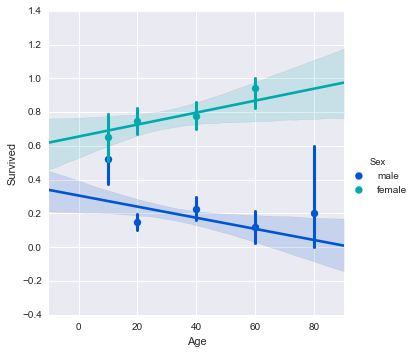

In [42]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

Awesome! we've gotten some really great insights on how gender,age, and class all related to a passengers chance of survival.

Now on the 6th quesiton:

Did the deck have an effect on the passengers survival rate?

In [43]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

In [44]:
new_deck = titanic_df['Cabin']

new_levels = []
for new_level in new_deck:
    new_levels.append(new_level[0])

titanic_df['Deck'] = DataFrame(new_levels) 
titanic_df = titanic_df[titanic_df.Deck != 'T']
titanic_df['Deck'] = titanic_df['Deck'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8})


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


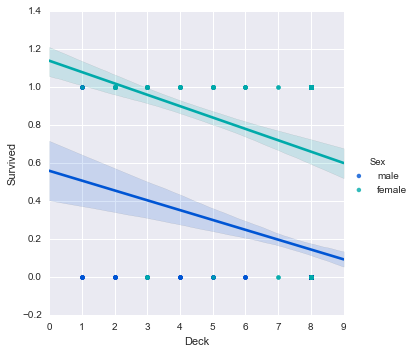

In [45]:
sns.lmplot('Deck','Survived',hue='Sex',data=titanic_df,palette='winter',)

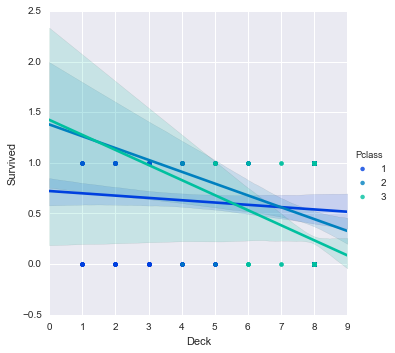

In [46]:
sns.lmplot('Deck','Survived',hue='Pclass',data=titanic_df,palette='winter')

So, it is clear that the deck on which the passenger was had an effect on whether he survived the crash or not.

7.) Did having a family member increase the odds of surviving the crash?


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(0, 10)

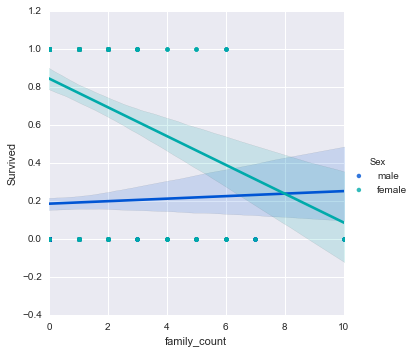

In [47]:
titanic_df['family_count'] = titanic_df['SibSp'] + titanic_df['Parch']
sns.lmplot('family_count','Survived',hue='Sex',data=titanic_df,palette='winter')
plt.xlim(titanic_df['family_count'].min(),titanic_df['family_count'].max())

So , it can be seen that if a female was alone she had better chance of survival than the female who was with family.
For males it was the opposite with a really less survival rate difference for a male with family to a male without family.